In [10]:
pip install yfinance --user

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

google = yf.Ticker("GOOG")

In [12]:
df = google.history(period='1d', interval="1m")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-25 09:30:00-04:00,125.209999,125.980003,125.180000,125.699997,2210805,0.0,0.0
2023-05-25 09:31:00-04:00,125.699997,125.779999,124.877502,125.019997,370352,0.0,0.0
2023-05-25 09:32:00-04:00,125.019997,125.434196,124.889999,124.919998,271595,0.0,0.0
2023-05-25 09:33:00-04:00,124.949997,125.290001,124.870003,125.099998,203465,0.0,0.0
2023-05-25 09:34:00-04:00,125.080002,125.110001,124.769997,125.110001,163335,0.0,0.0


In [13]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-25 09:30:00-04:00,125.180000
2023-05-25 09:31:00-04:00,124.877502
2023-05-25 09:32:00-04:00,124.889999
2023-05-25 09:33:00-04:00,124.870003
2023-05-25 09:34:00-04:00,124.769997


In [31]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,124.480003
09:31:00,124.699997
09:32:00,124.800903
09:33:00,124.849998
09:34:00,124.760002


In [4]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

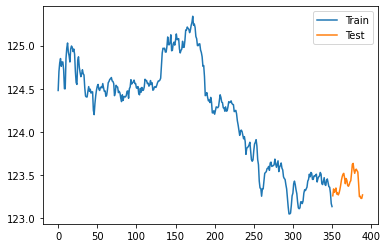

In [33]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 124.0188980102539
Real data for time 1: 123.88999938964844
Pred data for time 1: 124.03233651108818
